In [1]:
# pip install pyspark

In [2]:
# pip install findspark

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession


In [4]:
spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .getOrCreate()

In [5]:
import matplotlib.pyplot as plt
import pandas
import seaborn as sns
import re

In [6]:
df = spark.read.json(r"C:\Users\sarik\OneDrive\Desktop\wwee.json")
df.createOrReplaceTempView('WWE_Tweets')

In [7]:
user = df.select('user.screen_name','user.followers_count','id').distinct()
user.show()
# users.registerTempTable('WWE_Users')
user.createOrReplaceTempView('WWE_Users')

+---------------+---------------+-------------------+
|    screen_name|followers_count|                 id|
+---------------+---------------+-------------------+
|shawnha27226189|             24|1229629630363176961|
|   BAYLEYSBALOR|          21817|1229629830934564864|
|        life4rk|             92|1229630022065033219|
|    katie_manna|            465|1229630184929796097|
|  reliveviafilm|             24|1229630236200968192|
|  iqbal_naqib22|            157|1229630340324450305|
|     hari2totle|            454|1229630399417970694|
|    D3faultName|            552|1229630936066772993|
|   cozykillacam|            508|1229631032116178946|
|  toemas_castle|           1270|1229631227503640577|
|    rckthebellz|            195|1229631514926878720|
|aj_mcallister14|            172|1229631529355227137|
|  Plan9Alehouse|           1520|1229631628634415105|
|   CyberFM_Rock|           4442|1229631648888737793|
|        Jazcoed|          14271|1229631736100900865|
|   SeanRossSapp|          3

In [8]:
query1 = spark.sql("select screen_name as Username, max(followers_count) as No_of_Followers from WWE_Users group by screen_name order by No_of_followers desc limit 5")

In [9]:
pd = query1.toPandas()

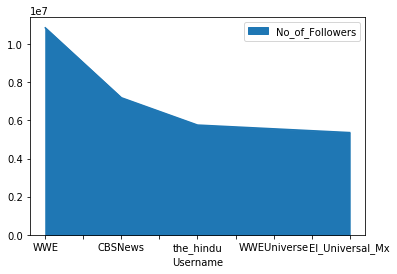

In [10]:
pd
# pd.plot.pie(y="No_of_Followers",labels=pd.Username.values.tolist(),autopct='%.2f')
pd.plot.area(x="Username",y="No_of_Followers")

In [11]:
query2 = spark.sql("select substring(user.created_at,1,3) as Day, count(user.id) as Tweet_count from WWE_Tweets where substr(user.created_at,1,3) is not null group by Day")

In [12]:
pd2 = query2.toPandas()

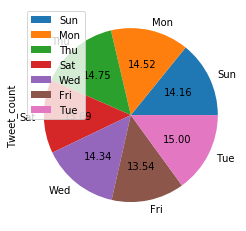

In [13]:
pd2
pd2.plot.pie(y="Tweet_count",labels=pd2.Day.values.tolist(),autopct='%.2f')

In [14]:
query3=spark.sql("Select user.screen_name,count(*) as tweet_count from WWE_Tweets group by user.screen_name order by tweet_count desc limit 10")

In [15]:
pd3 = query3.toPandas()

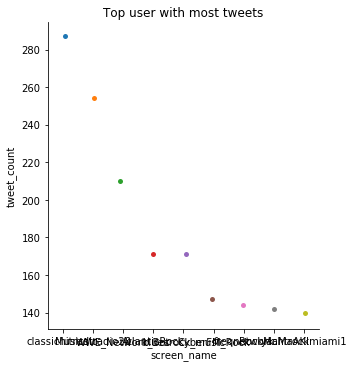

In [16]:
pd3final=pd3.dropna()
# pd3final.plot.bar(x="screen_name",y="tweet_count")
#pd6.plot.pie(y="tweet_count",labels=pd6.screen_name.values.tolist(),autopct='%.f')
sns.catplot(x='screen_name', y='tweet_count', data=pd3final).set(title='Top user with most tweets')

In [17]:
query4 = spark.sql("select user.screen_name,text,retweeted_status.retweet_count from WWE_Tweets order by retweeted_status.retweet_count DESC limit 10")

In [18]:
pd4 = query4.toPandas()

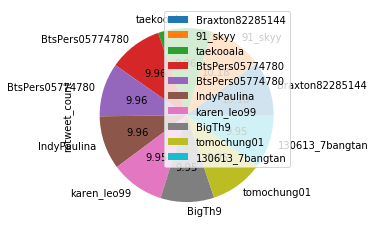

In [19]:
pd4
pd4.plot.pie(y="retweet_count",labels=pd4.screen_name.values.tolist(),autopct='%.2f')

In [20]:
query5 = spark.sql("select count(*) as Count,q.text from (select case when text like '%John Cena%' then 'John Cena' when text like '%Rock%' then 'Rock'when text like '%Roman Reigns%' then 'Roman Reigns' when text like '%Kane%' then 'Kane' when text like '%Sasha Banks%' then 'Sasha Banks' when text like '%Undertaker%' then 'Undertaker' else 'Different_player' end as text from WWE_Tweets) q group by q.text")

In [21]:
pd5 = query5.toPandas()

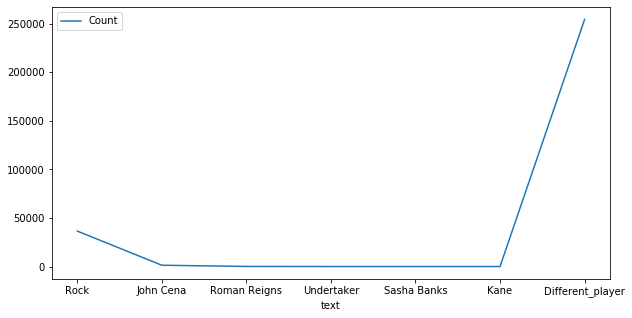

In [22]:
pd5
pd5.plot(x="text",y='Count',figsize=(10,5))

In [23]:
query6 = spark.sql("select substring(user.created_at,27,4) as year, count(*) as Count from WWE_Tweets where user.created_at is not null group by substring(user.created_at,27,4) order by count(*) desc")

In [24]:
pd6 = query6.toPandas()

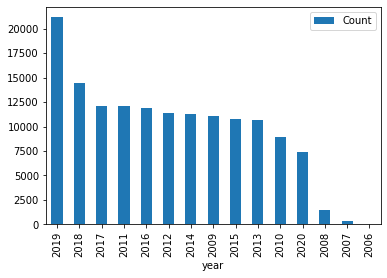

In [25]:
pd6
pd6.plot.bar(x="year",y="Count")

In [26]:
query7 = spark.sql("select place.country, count(*) as count from WWE_Tweets where place.country is not null group by place.country order by count desc limit 10")
    

In [27]:
pd7 = query7.toPandas()

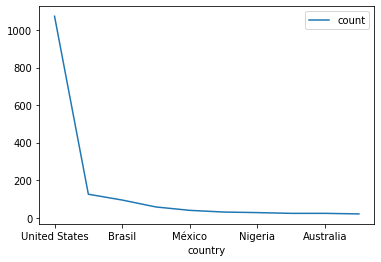

In [28]:
pd7
pd7.plot(x="country",y="count")

In [29]:
day_data = spark.sql("SELECT substring(user.created_at,1,3) as day from WWE_Tweets where text is not null")
day_data.createOrReplaceTempView("day_data")

days_final = spark.sql(
          """ SELECT Case
            when day LIKE '%Mon%' then 'WEEKDAY'
            when day LIKE '%Tue%' then 'WEEKDAY'
            when day LIKE '%Wed%' then 'WEEKDAY'
            when day LIKE '%Thu%' then 'WEEKDAY'
            when day LIKE '%Fri%' then 'WEEKDAY'
            when day LIKE '%Sat%' then 'WEEKEND'
            when day LIKE '%Sun%' then 'WEEKEND'
             else
             null
             end as day1 from day_data where day is not null""")
days_final.createOrReplaceTempView("days_final")
query8 = spark.sql("SELECT day1 as Day,Count(*) as Day_Count from days_final where day1 is not null group by day1 order by count(*) desc")

In [30]:
pd8 = query8.toPandas()

In [38]:
pd8
#pd8.plot.pie(y="Day_Count", labels=pd8.Day.tolist(), autopct='%.2f',
#                            title="Tweets posted on weekend and weekday")
# pd8.plot(x="Day",y='Day_Count',color='DarkRed')
#sns.catplot(x="Day",y="Day_Count",data=pd8,kind="point").set(title="Tweets posted on weekend and weekday")

,Day,Day_Count
0,WEEKDAY,104631
1,WEEKEND,40379


In [32]:
query9 = spark.sql("select lang, count(1) Tweets from WWE_Tweets group by lang order by Tweets desc limit 10")

In [33]:
pd9 = query9.toPandas()

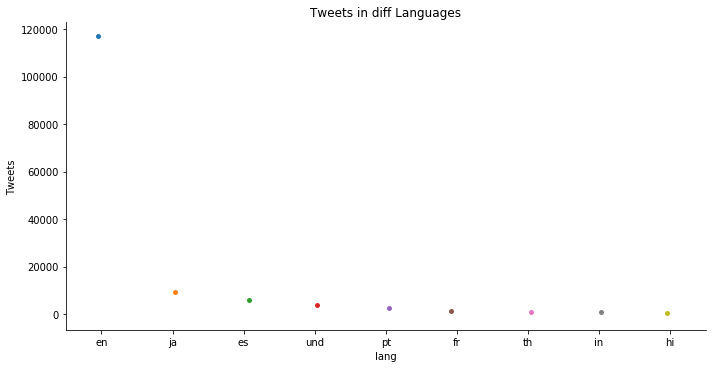

In [34]:
pd9
#pd9.plot.area(x="lang",y="Tweets")
sns.catplot(x='lang',y='Tweets',data=pd9,height=5,aspect=2).set(title = 'Tweets in diff Languages')


In [35]:
query10 = spark.sql("select substring(user.created_at,5,3) as month,count(user.id) as No_of_Tweets from WWE_Tweets where substr(user.created_at,5,3) is not null group by month")

In [36]:
pd10 = query10.toPandas()

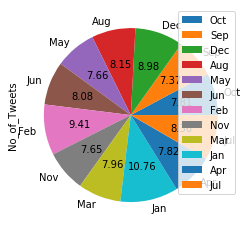

In [37]:
pd10
pd10.plot.pie(y="No_of_Tweets",labels=pd10.month.values.tolist(),autopct='%.2f')